### Movie Correlation Analysis

#### Introduction
In this project, I analyze a dataset containing detailed information about various movies, including release dates, budgets, earnings, ratings, and more. The primary goal is to understand the relationships between different movie features and how they impact movie earnings.

#### Objectives

1. **Data Preprocessing:**

    * **Data Understanding:** Gain a comprehensive understanding of the dataset to better define the tasks and goals of the analysis.
    * **Data Cleaning:** Ensure the dataset's accuracy and reliability by handling missing values, correcting errors, removing duplicates, and converting data types. This step is crucial for maintaining the quality of subsequent analyses.

2. **Feature Engineering:**

    * Create new features from the existing data to enhance the analysis process. This may involve transforming data types, extracting information, or generating new columns.

3. **Data Analysis:**

    * **Movie Correlation Analysis:** Use data analysis techniques to identify and visualize trends and patterns within the dataset.

In [135]:
import pandas as pd

df = pd.read_csv('movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


**Data Preprocessing**

In [136]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [138]:
# Missing values
import numpy as np

for col in df.columns:
    na_values = np.mean(df[col].isnull())
    print(f'{col} - {na_values: .5%} NA')

name -  0.00000% NA
rating -  1.00417% NA
genre -  0.00000% NA
year -  0.00000% NA
released -  0.02608% NA
score -  0.03912% NA
votes -  0.03912% NA
director -  0.00000% NA
writer -  0.03912% NA
star -  0.01304% NA
country -  0.03912% NA
budget -  28.31247% NA
gross -  2.46479% NA
company -  0.22170% NA
runtime -  0.05216% NA


In [139]:
# Due to low percentages, I decided to drop NA rows
df = df.dropna()

# Double check
for col in df.columns:
    na_values = np.mean(df[col].isnull())
    print(f'{col} - {na_values: .5%} NA')

name -  0.00000% NA
rating -  0.00000% NA
genre -  0.00000% NA
year -  0.00000% NA
released -  0.00000% NA
score -  0.00000% NA
votes -  0.00000% NA
director -  0.00000% NA
writer -  0.00000% NA
star -  0.00000% NA
country -  0.00000% NA
budget -  0.00000% NA
gross -  0.00000% NA
company -  0.00000% NA
runtime -  0.00000% NA


**Feature Engineering**

In [141]:
# Changing data typs from float64 to int64
df['votes'] = df['votes'].astype('int64') 
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

In [142]:
# Creating a new column for extracting the current year from the 'released' column
df['realsed_year'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

'''The pattern '([0-9]{4})' does the following:
[0-9] matches any digit from 0 to 9.
{4} specifies that exactly four digits should be matched.'''

"The pattern '([0-9]{4})' does the following:\n[0-9] matches any digit from 0 to 9.\n{4} specifies that exactly four digits should be matched."

**Data Analysis**

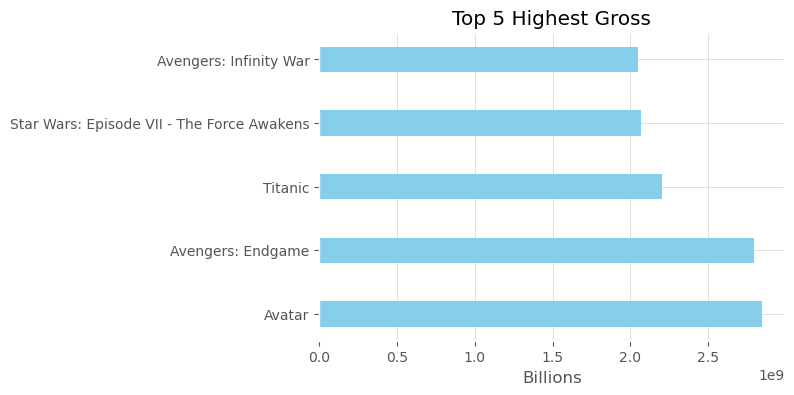

In [143]:
# Ordering by 'gross' column
df = df.sort_values('gross', ascending=False)
top_5_groos = df.head(5)

import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.barh(top_5_groos['name'], top_5_groos['gross'], color='skyblue', height= 0.4)
#plt.xticks(all_months) # showing all the months
plt.title('Top 5 Highest Gross')
plt.xlabel('Billions')
plt.grid(True, linestyle='-', linewidth=0.5, color='lightgray', zorder=1)
plt.show()

Correlation

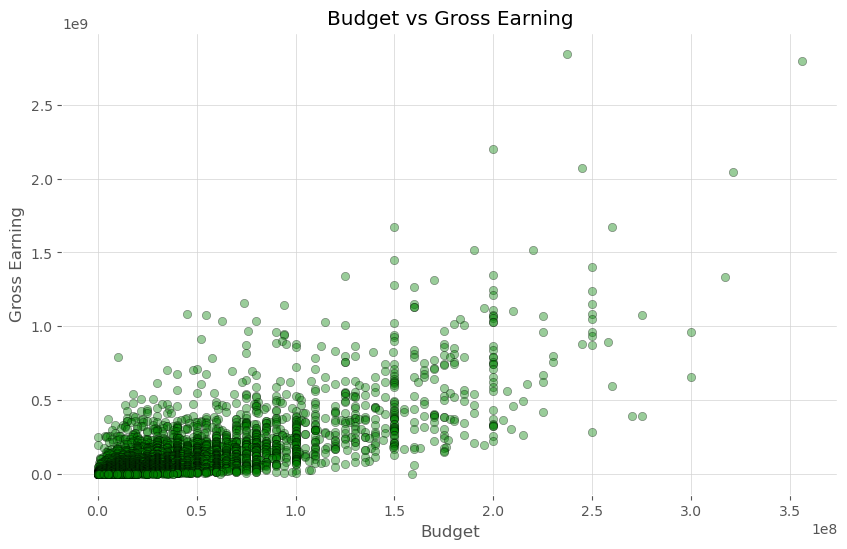

In [144]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6)) 
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.4, c='green', edgecolor='k')
plt.title('Budget vs Gross Earning')
plt.xlabel('Budget')
plt.ylabel('Gross Earning')
plt.grid(True, linestyle='-', linewidth=0.5, color='lightgray', zorder=1)
plt.show()

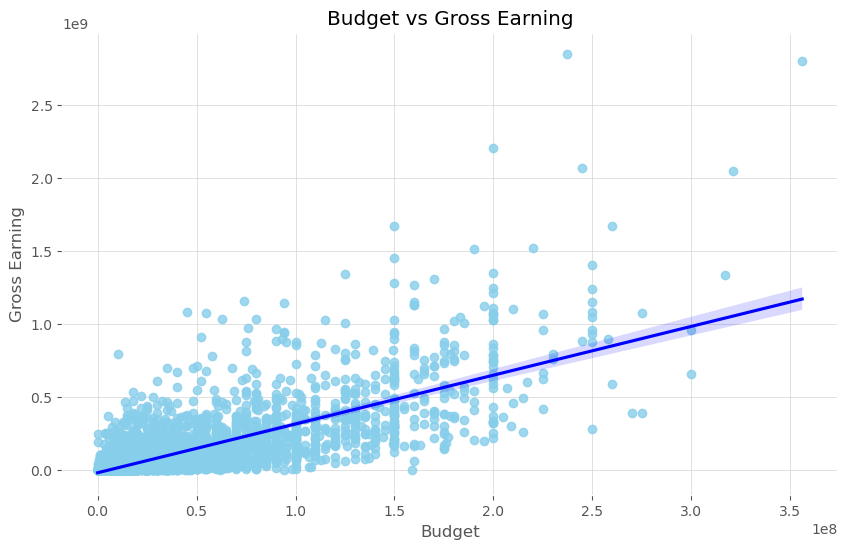

In [145]:
# Plot Budget vs Gross using seaborn
import seaborn as sns
plt.figure(figsize=(10, 6)) 
sns.regplot(
    x='budget', 
    y='gross', 
    data=df, scatter_kws={'color': 'skyblue'}, 
    line_kws={'color': 'blue'}
    )
plt.title('Budget vs Gross Earning')
plt.xlabel('Budget')
plt.ylabel('Gross Earning')
plt.grid(True, linestyle='-', linewidth=0.5, color='lightgray', zorder=1)

In [146]:
# Removing duplicated column for the correlation
df.drop(columns= 'year', inplace= True)

In [147]:
numeric_df = df.select_dtypes(include='number') # Select only numeric columns for correlation
correlation_matrix = numeric_df.corr() # Calculate correlation matrix
correlation_matrix

,score,votes,budget,gross,runtime,realsed_year
score,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
realsed_year,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


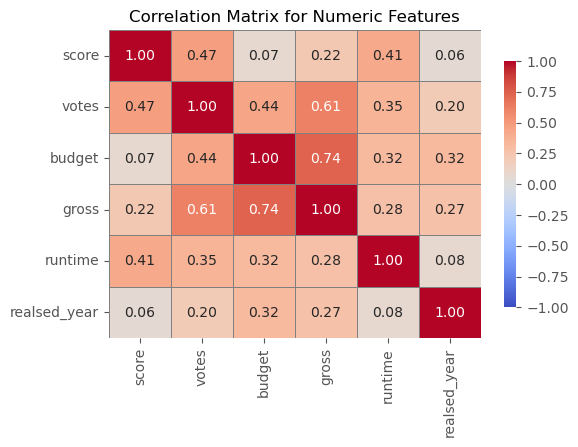

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume numeric_df is already defined and contains only numeric data
correlation_matrix = numeric_df.corr(method='pearson')

# Create the heatmap
plt.figure(figsize=(6, 4))  # Adjust the figure size for better readability
sns.heatmap(
    correlation_matrix, 
    annot=True,                  # Show correlation values
    cmap='coolwarm',             # Color map
    fmt='.2f',                   # Format annotation to 2 decimal places
    vmin=-1, vmax=1,             # Set the limits for the color map
    linewidths=0.5,              # Add lines between cells
    linecolor='gray',            # Color of the lines between cells
    cbar_kws={'shrink': 0.8}     # Color bar size adjustment
)
plt.title('Correlation Matrix for Numeric Features', fontsize=12)
plt.show()


In [155]:
# Creating a correlation list, and order it
corr_pairs = correlation_matrix.unstack()
sorted_pairs = corr_pairs.sort_values(ascending = False)
sorted_pairs[(sorted_pairs) > 0.5]

score         score           1.000000
votes         votes           1.000000
runtime       runtime         1.000000
gross         gross           1.000000
budget        budget          1.000000
realsed_year  realsed_year    1.000000
gross         budget          0.740247
budget        gross           0.740247
votes         gross           0.614751
gross         votes           0.614751
dtype: float64

**Conclusion:**  
The analysis reveals a strong correlation between movie budget and gross earnings. This is intuitive, as higher budgets often lead to more significant investments in production, marketing, and distribution, which can drive higher earnings. Further exploration could involve more granular analysis or other features to understand additional patterns in movie success.